<a href="https://colab.research.google.com/github/SudhakarShivashankar/MachineLearningSamples/blob/master/RelationDBwithLLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Setting up kaggle

In [8]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle

List Kaggle Data sets

In [4]:
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          19581        365  1.0              
abdulszz/spotify-most-streamed-songs                             Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           5852         76  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset      Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12            591         24  1.0              
owm4096/laptop-prices                                  

In [5]:
! kaggle datasets list -s "customerservice"

ref                                     title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------  -----------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
tobiasbueck/capterra-reviews            Capterra Ticketsystem - Jira, Zendesk - Reviews  1001KB  2024-06-25 13:20:41             37          2  1.0              
smmmmmmmmmmmm/customer-feedback-survey  Customer FeedBack Survey                           87KB  2023-11-29 19:37:19             95          0  0.4117647        


Downloading the customer service dataset from Kaggle


In [9]:
!kaggle datasets download datasets/tobiasbueck/capterra-reviews


403 - Forbidden - Permission 'datasets.get' was denied


In [14]:
! unzip capterra-reviews.zip

unzip:  cannot find or open capterra-reviews.zip, capterra-reviews.zip.zip or capterra-reviews.zip.ZIP.


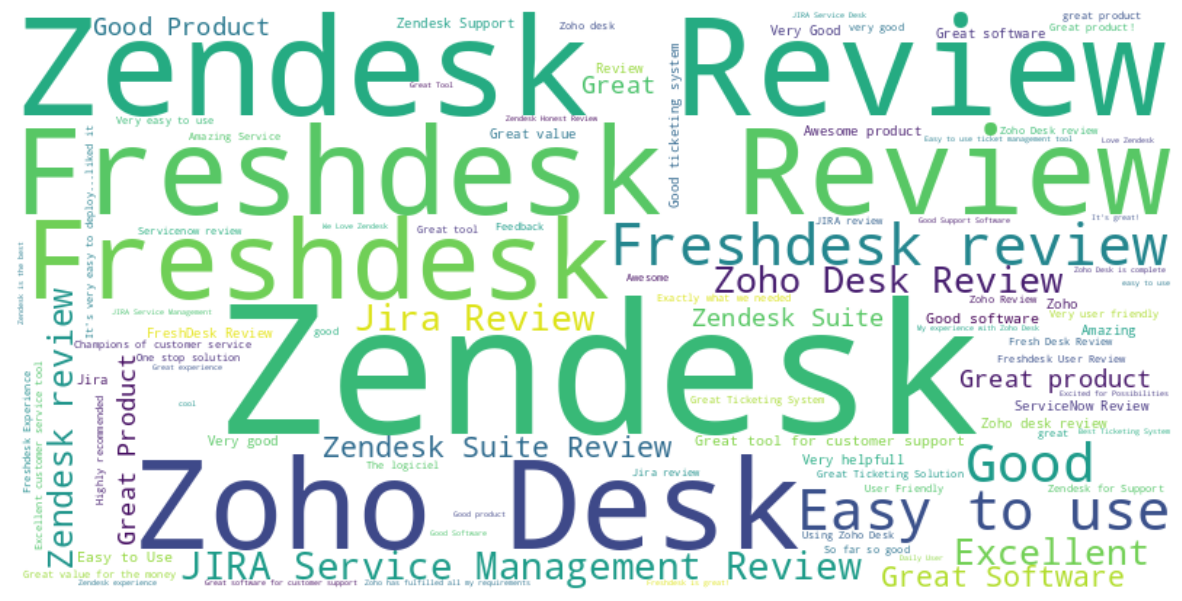

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("capterra_reviews.csv")
top_100_reviews = df['title'].value_counts().head(100)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_reviews)

# Display the generated word cloud:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

In [11]:
%load_ext sql

In [12]:
import sqlite3 as sql
db_path = '/content/capterra_reviews.db'

# Connect to the SQLite database (this will create the database if it does not exist)
conn = sql.connect(db_path)

# Check if the table exists
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='capterra_reviews';")
table_exists = cursor.fetchone()

# If the table doesn't exist, create it from the DataFrame
if not table_exists:
    df.to_sql('capterra_reviews', conn, index=False)
    print("Table 'capterra_reviews' created and data inserted.")
else:
    print("Database and table 'capterra_reviews' already exist.")

Table 'capterra_reviews' created and data inserted.


In [13]:
# simple utility to make the text wrap properly when printing.
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [14]:
%%sql
sqlite:///capterra_reviews.db
select * from capterra_reviews LIMIT 5;

Done.


[('Zoho Desk', 'Excellent solution that meets all of our requirements.', "Zoho Desk is a top-tier platform for developing individualized customer service offerings. It's a separate platform connected to the company that has ... (114 characters truncated) ... s. I've been using Zoho Desk for quite some time now, and it's been invaluable for streamlining my operations and those of my customer service staff.", "As a ticketing and customer service platform, Zoho Desk comes highly recommended from me. Because of how simple and straightforward it is to use, my  ... (345 characters truncated) ... solves any problems that may arise. In conclusion, Zoho Desk is an excellent option for any company that wants to boost its customer care procedures.", 'Although the program provides a great return on investment, the upfront fees might be prohibitive, especially for startups. One other thing that may  ... (63 characters truncated) ... d to export data to external programs to gain a full picture of my customer service performance because the present reporting options are inadequate.', 5, 5.0, 5.0, 5.0, 4.0, 10.0, 1, -1, 1, 1, 0, 0, 0, 1, 0, 0),
 ('Zoho Desk', 'Offers multiple options to help customers get their issues resolved quickly', 'Provides web-based customer support, reducing workloads and leaving our customers happy and confident in the support we provide them.', 'In the period I have used Zoho Desk, I have experienced huge internal and external support systems improvement while reducing the cost. It is easy to ... (87 characters truncated) ... ity. Also, workflow management, incident management and knowledge management are key pillars while using Zoho Desk. It is affordable and easy to use.', 'Zoho Desk gives maximum scalability and return on investment. I have nothing to complain about so far.', 5, 5.0, 5.0, 5.0, 5.0, 9.0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0),
 ('Zoho Desk', "Zoho Desk isn't a favourite option of mine, but it works.", 'Zoho Desk is a great tool with many features, it seems some features may need ironing out or better documenting but otherwise it is a very useful too ... (178 characters truncated) ... ose wanting to use the help desk knowledgebase solutions you may want to set aside some time to fully understand how it works and how to best use it.', "Zoho Desk offers a range of tools to make sure that customer success rates are high. Their self service options are empowering and wouldn't be possib ... (378 characters truncated) ... ty to send branded emails directly from Zoho Desk with correct SPF records to keep the email safe is also a great feature that I couldn't be without.", 'Unfortunately the creation and customisation of the help desk and the posts within it come across as difficult to create and maintain even from the p ... (147 characters truncated) ... ect self-service help desk to enable customers to get help immediately and free up time for agents to answer more complex and user specific problems.', 3, 3.0, 4.0, 3.0, 3.0, 5.0, 1, 0, 1, 0, 1, 1, 0, 0, -1, 1),
 ('Zoho Desk', 'Keep your customers happy', 'Zoho Desk is very responsive and fast, is packed with useful features and easy to use for everybody.', 'In my line of business the returning customers is very important and that why is important to keep them happy and respond to their issues as fast as  ... (97 characters truncated) ... a about the customers can be acceded easily. The system is simple and intuitive and all my colleagues use it with ease, even the older non tech ones.', "We have experienced slow loading some time ago, didn't happened again but it was very annoying (was not from the internet connection).", 5, 5.0, 5.0, 5.0, 5.0, 9.0, 1, 0, -1, 0, 1, 1, 0, 0, 0, 1),
 ('Zoho Desk', 'A fantastic tool for answering customer queries', "Questions about orders or invoices, tickets, and customer administration. We were able to streamline our operations with the support of Zoho desk's improved visibility, timeliness, and visibility into the resolution of o

Vectorize the Scalar DB

In [15]:
!pip -q install langchain langchain-community sentence-transformers chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [16]:
from langchain_community.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(
    model_name="BAAI/bge-small-en-v1.5",
    model_kwargs={'device': 'cpu'},
    encode_kwargs={'normalize_embeddings': False}
)

<ipython-input-16-0ab51933c609>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
# Query and create documents.
from langchain.docstore.document import Document
doc = []
cur = conn.cursor()
cur.execute("SELECT [overall_text],[pros_text],[cons_text] FROM capterra_reviews")
rows = cur.fetchall()


# Process each row and create Document objects
for row in rows:
    overall_text = row[0] if row[0] is not None else ""  # Handle None by converting to empty string
    pros_text = row[1] if row[1] is not None else ""     # Handle None
    cons_text = row[2] if row[2] is not None else ""     # Handle None

    # Create a document with page_content and metadata
    page = Document(
        page_content=overall_text + " overall_text: " + cons_text,
        metadata={'pros_text': pros_text, 'cons_text': cons_text}
    )
    doc.append(page)

print(doc)

[Document(metadata={'pros_text': "As a ticketing and customer service platform, Zoho Desk comes highly recommended from me. Because of how simple and straightforward it is to use, my staff has had no trouble adapting it for handling client concerns. We've been able to enhance productivity and optimize our processes because to the platform's many useful features, including as automation and connections to other Zoho products. We also like how quickly and effectively the customer service team responds to our inquiries and resolves any problems that may arise. In conclusion, Zoho Desk is an excellent option for any company that wants to boost its customer care procedures.", 'cons_text': 'Although the program provides a great return on investment, the upfront fees might be prohibitive, especially for startups. One other thing that may be improved with Zoho Desk is the reporting capabilities. I need to export data to external programs to gain a full picture of my customer service performanc

In [18]:
from langchain_community.vectorstores import Chroma
try:
  vector_db = Chroma.from_documents(doc, embedding_model)
except Exception as error:
    print("An exception occurred:", type(error).__name__)

In [19]:
query = "Positive reviews"
docs = vector_db.similarity_search(query, k=4)
docs

[Document(metadata={'cons_text': 'There are no specific negative issues that I can note about ServiceNow.', 'pros_text': "ServiceNow allows me to easily log a ticket for any IT matters. The system makes it easy for me to lodge tickets, and sit back and relax while an IT personnel is quickly assigned to my task. It's much easier to work through ServiceNow, than to run up and down to my local office's IT department (which can be frustrating if they are already busy or in meetings, and you just have to wait for assistance, wasting time away from your work duties)."}, page_content='My overall experience with ServiceNow has been positive. overall_text: There are no specific negative issues that I can note about ServiceNow.'),
 Document(metadata={'cons_text': 'I liked everything about this product. There is nothing which I disliked', 'pros_text': 'I liked the user interface of this product.'}, page_content='Good overall_text: I liked everything about this product. There is nothing which I di

In [20]:
for doc in docs:
    # Extracting page_content and metadata for readability
    overall_text = doc.page_content
    pros_text = doc.metadata['pros_text']  # Accessing pros_text
    cons_text = doc.metadata['cons_text']  # Accessing cons_text

    # Print or use the values as needed
    print(f"Overall: {overall_text}")
    print(f"Pros: {pros_text}")
    print(f"Cons: {cons_text}")



Overall: My overall experience with ServiceNow has been positive. overall_text: There are no specific negative issues that I can note about ServiceNow.
Pros: ServiceNow allows me to easily log a ticket for any IT matters. The system makes it easy for me to lodge tickets, and sit back and relax while an IT personnel is quickly assigned to my task. It's much easier to work through ServiceNow, than to run up and down to my local office's IT department (which can be frustrating if they are already busy or in meetings, and you just have to wait for assistance, wasting time away from your work duties).
Cons: There are no specific negative issues that I can note about ServiceNow.
Overall: Good overall_text: I liked everything about this product. There is nothing which I disliked
Pros: I liked the user interface of this product.
Cons: I liked everything about this product. There is nothing which I disliked
Overall: Our business has achieved excellent results, particularly in terms of customer 

In [21]:
!pip install -q langchain-groq

In [22]:
import os
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
llm_groq = ChatGroq(model_name="llama3-70b-8192")

In [23]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("Answer this question in detail: {question} from these documents {context} pulled from our database. \
Correct the names if needed. If possible, tell us how these events are connected. At the end print parse the  original context as citations.")
chain = (
    {"context": vector_db.as_retriever(), "question": RunnablePassthrough()}
    | prompt
    | llm_groq
    | StrOutputParser()
)

In [24]:
print(chain.invoke("Service Now Issues"))

After analyzing the provided documents, I identified the following ServiceNow issues and categorized them accordingly:

**Issues with ServiceNow:**

1. **Limited features**: One user mentioned that the features are limited, which might not be sufficient for their needs. (Document 1)
2. **Poor UI**: Two users complained about the user interface being very bad, which might affect the user experience. (Documents 1 and 2)
3. **Customer support**: One user suggested that ServiceNow's customer support can be improved, indicating potential issues with support quality or responsiveness. (Document 3)

**Positive experiences:**

1. **Ease of setup**: One user praised ServiceNow for being easy to set up, which suggests a smooth onboarding process. (Document 1)
2. **Improved service**: Two users reported that ServiceNow has allowed them to improve their service, indicating a positive impact on their operations. (Documents 2 and 3)
3. **Robust usage**: One user highlighted the benefits of ServiceNo

In [25]:
from langchain_community.utilities import SQLDatabase
db = SQLDatabase.from_uri("sqlite:///capterra_reviews.db")
def get_schema(_):
    return db.get_table_info()
def run_query(query):
    return db.run(query)

In [26]:
template = """Based on the table schema below, write a SQL query that would answer the user's question:
{schema}

Question: {question}
Give ONLY the query without the prepending ```sql and no explanation around the code. This has to be passed to a code interpreter.
"""
prompt = ChatPromptTemplate.from_template(template)

In [27]:
from langchain_community.utilities import SQLDatabase
db = SQLDatabase.from_uri("sqlite:///capterra_reviews.db")
def get_schema(_):
    return db.get_table_info()
def run_query(query):
    return db.run(query)

In [28]:
get_schema(_)

'\nCREATE TABLE capterra_reviews (\n\tticket_system TEXT, \n\ttitle TEXT, \n\toverall_text TEXT, \n\tpros_text TEXT, \n\tcons_text TEXT, \n\toverall_rating INTEGER, \n\tease_of_use REAL, \n\tcustomer_service REAL, \n\tfeatures REAL, \n\tvalue_for_money REAL, \n\tlikelihood_to_recommend REAL, \n\t"Ticket Creation and Assignment" INTEGER, \n\t"Automated Ticket Routing" INTEGER, \n\t"Status Tracking and Updates" INTEGER, \n\t"Priority and SLA Management" INTEGER, \n\t"Customer and Agent Portals" INTEGER, \n\t"Knowledge Base Integration" INTEGER, \n\t"Email Notifications and Alerts" INTEGER, \n\t"Reporting and Analytics" INTEGER, \n\t"Customizable Workflows" INTEGER, \n\t"Multi-Channel Support (Email, Chat, Phone)" INTEGER\n)\n\n/*\n3 rows from capterra_reviews table:\nticket_system\ttitle\toverall_text\tpros_text\tcons_text\toverall_rating\tease_of_use\tcustomer_service\tfeatures\tvalue_for_money\tlikelihood_to_recommend\tTicket Creation and Assignment\tAutomated Ticket Routing\tStatus Tr

In [29]:
sql_response = (
    RunnablePassthrough.assign(schema=get_schema)
    | prompt
        | llm_groq.bind(stop=["\nSQLResult:"])
    | StrOutputParser()
)
print(sql_response.invoke({"question": "How many positive reviews are there?"}))

SELECT COUNT(*) FROM capterra_reviews WHERE overall_rating > 3;


In [30]:
sql_chain = (
    RunnablePassthrough.assign(query=sql_response).assign(
        schema=get_schema,
        response=lambda x: db.run(x["query"]),
    )
)
sql_chain.invoke({"question": "Give me the reviews where ratings are less than 2"})

{'question': 'Give me the reviews where ratings are less than 2',
 'query': 'SELECT * FROM capterra_reviews WHERE overall_rating < 2;',
 'schema': '\nCREATE TABLE capterra_reviews (\n\tticket_system TEXT, \n\ttitle TEXT, \n\toverall_text TEXT, \n\tpros_text TEXT, \n\tcons_text TEXT, \n\toverall_rating INTEGER, \n\tease_of_use REAL, \n\tcustomer_service REAL, \n\tfeatures REAL, \n\tvalue_for_money REAL, \n\tlikelihood_to_recommend REAL, \n\t"Ticket Creation and Assignment" INTEGER, \n\t"Automated Ticket Routing" INTEGER, \n\t"Status Tracking and Updates" INTEGER, \n\t"Priority and SLA Management" INTEGER, \n\t"Customer and Agent Portals" INTEGER, \n\t"Knowledge Base Integration" INTEGER, \n\t"Email Notifications and Alerts" INTEGER, \n\t"Reporting and Analytics" INTEGER, \n\t"Customizable Workflows" INTEGER, \n\t"Multi-Channel Support (Email, Chat, Phone)" INTEGER\n)\n\n/*\n3 rows from capterra_reviews table:\nticket_system\ttitle\toverall_text\tpros_text\tcons_text\toverall_rating\teas

In [31]:
response = sql_chain.invoke({"question": "How many negative reviews are there?"})
print(response['query'])
print(response['response'])

SELECT COUNT(*) FROM capterra_reviews WHERE overall_rating < 4;
[(326,)]


In [32]:
print(response['query'])

SELECT COUNT(*) FROM capterra_reviews WHERE overall_rating < 4;


In [33]:
response['response']

'[(326,)]'

In [34]:
!pip install -U -q langchain_groq gradio

In [35]:
response = sql_chain.invoke({"question": "Classify negative reviews into different categories"})
print(response['query'])
print(response['response'])

SELECT 
  cons_text, 
  CASE 
    WHEN cons_text LIKE '%pricing%' OR cons_text LIKE '%cost%' OR cons_text LIKE '%investment%' THEN 'Pricing/Cost'
    WHEN cons_text LIKE '%customization%' OR cons_text LIKE '%setup%' THEN 'Customization/Setup Issues'
    WHEN cons_text LIKE '%features%' OR cons_text LIKE '%functionality%' THEN 'Features/Functionality Issues'
    WHEN cons_text LIKE '%user interface%' OR cons_text LIKE '%usability%' THEN 'User Interface/Usability Issues'
    WHEN cons_text LIKE '%support%' OR cons_text LIKE '%service%' THEN 'Support/Service Issues'
    ELSE 'Other'
  END AS category
FROM 
  capterra_reviews
WHERE 
  overall_rating < 4;
[('Unfortunately the creation and customisation of the help desk and the posts within it come across as difficult to create and maintain even from the perspective of someone working in computer software. It is unclear what features are available for this and how they should be used to create a...', 'Features/Functionality Issues'), ('Alter

In [38]:
response = sql_chain.invoke({"question": "How many negative reviews"})
print(response['query'])
print(response['response'])

SELECT COUNT(*) FROM capterra_reviews WHERE overall_rating < 4;
[(326,)]


In [40]:
response = sql_chain.invoke({"question": "Plot a graph of count of positive v/s negative reviews"})
print(response['query'])
print(response['response'])

SELECT 
  CASE WHEN overall_rating > 3 THEN 'Positive' ELSE 'Negative' END AS Review_Type, 
  COUNT(*) AS Count_of_Reviews
FROM 
  capterra_reviews
GROUP BY 
  CASE WHEN overall_rating > 3 THEN 'Positive' ELSE 'Negative' END
[('Negative', 326), ('Positive', 4573)]
